<a href="https://colab.research.google.com/github/jovitaand/AI-Incident-Risk-Assessment-Analyzing-Microsoft-Copilot-/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd

# Load the uploaded Excel file to analyze its contents
file_path = '/content/data.xlsx'

In [58]:
# Load the sheet names to understand the structure of the Excel file
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
sheet_names


['About | README',
 'Repository',
 'Systems',
 'Datasets',
 'Grok chatbot',
 'Political misuse monitor',
 'Tesla Autopilot fatalities']

In [59]:
# Load the "Repository" sheet and check its structure
repository_data = pd.read_excel(file_path, sheet_name="Repository")

# Display the first few rows to understand its structure
repository_data.head()


,AIAAIC Repository (beta) [ REPORT INCIDENT ],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,AIAAIC ID#,Headline,Type,Released,Occurred,Country(ies),Sector(s),Deployer(s),Developer(s),System name(s),...,Issue(s),Transparency,External harms,NaN,NaN,Internal harms,NaN,NaN,NaN,Description/links
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Individual,Societal,Environmental,Strategic/reputational,Operational,Financial,Legal/regulatory,NaN
2,AIAAIC1803,Singapore man jailed for creating deepfake por...,Incident,NaN,2022,Singapore,Media/entertainment/sports/arts,NaN,NaN,NaN,...,Ethics/values; Safety,Governance; Marketing,Anxiety/distress,NaN,NaN,NaN,NaN,NaN,Litigation,https://www.aiaaic.org/aiaaic-repository/ai-al...
3,AIAAIC1802,Study: Language models gather and pass persona...,Issue,NaN,2024,NaN,Multiple,NaN,Mistral; Zhipu AI,ChatGLM; Le Chat,...,Privacy; Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
4,AIAAIC1801,Fake AI airline reviews take off after ChatGPT...,Incident,NaN,2024,Global,Transport/logistics,NaN,OpenAI,ChatGPT,...,Dual/multi-use; Ethics/values,NaN,NaN,Reputational damage,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


The "Repository" sheet contains structured data with columns such as "AIAAIC ID#", "Headline","Type","Countries","Sector(s)","Issue(s), and "Description/Links".

> Let's clean and format this data to maket it more accessible for analysis

In [60]:
# Check the actual number of columns to adjust the renaming
repository_data.columns, len(repository_data.columns)


(Index(['AIAAIC Repository (beta) [ REPORT INCIDENT ]', 'Unnamed: 1',
        'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
        'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
        'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
        'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
        'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
       dtype='object'),
 23)

In [61]:
# Redefine the column names to match the 23 columns in the dataset
repository_data.columns = [
    "ID", "Headline", "Type", "Released", "Occurred", "Country",
    "Sector", "Deployer", "Developer", "System Name", "Source",
    "Source Date", "Reporter", "Issues", "Transparency",
    "External Harms", "Internal Harms", "Financial Impact",
    "Legal/Regulatory", "Description", "Additional Info 1", "Additional Info 2", "Additional Info 3"
]

# Drop any rows with missing IDs (header/footer rows) and reset index
repository_data = repository_data.dropna(subset=["ID"]).reset_index(drop=True)

# Display the cleaned data to ensure structure is now correct
repository_data.head()


,ID,Headline,Type,Released,Occurred,Country,Sector,Deployer,Developer,System Name,...,Issues,Transparency,External Harms,Internal Harms,Financial Impact,Legal/Regulatory,Description,Additional Info 1,Additional Info 2,Additional Info 3
0,AIAAIC ID#,Headline,Type,Released,Occurred,Country(ies),Sector(s),Deployer(s),Developer(s),System name(s),...,Issue(s),Transparency,External harms,NaN,NaN,Internal harms,NaN,NaN,NaN,Description/links
1,AIAAIC1803,Singapore man jailed for creating deepfake por...,Incident,NaN,2022,Singapore,Media/entertainment/sports/arts,NaN,NaN,NaN,...,Ethics/values; Safety,Governance; Marketing,Anxiety/distress,NaN,NaN,NaN,NaN,NaN,Litigation,https://www.aiaaic.org/aiaaic-repository/ai-al...
2,AIAAIC1802,Study: Language models gather and pass persona...,Issue,NaN,2024,NaN,Multiple,NaN,Mistral; Zhipu AI,ChatGLM; Le Chat,...,Privacy; Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
3,AIAAIC1801,Fake AI airline reviews take off after ChatGPT...,Incident,NaN,2024,Global,Transport/logistics,NaN,OpenAI,ChatGPT,...,Dual/multi-use; Ethics/values,NaN,NaN,Reputational damage,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
4,AIAAIC1800,Study: Generative AI systems overstate what th...,Issue,NaN,2024,USA,Multiple,NaN,Anthropic; OpenAI,Claude 3; GPT-4o; GPT-3,...,Accuracy/reliability; Ethics/values; Mis/disin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


Removing all the duplicates

In [62]:
# Remove the duplicate header row by selecting data starting from the second row
repository_data = repository_data.iloc[1:].reset_index(drop=True)

# Display the cleaned data to confirm the structure
repository_data.head()


,ID,Headline,Type,Released,Occurred,Country,Sector,Deployer,Developer,System Name,...,Issues,Transparency,External Harms,Internal Harms,Financial Impact,Legal/Regulatory,Description,Additional Info 1,Additional Info 2,Additional Info 3
0,AIAAIC1803,Singapore man jailed for creating deepfake por...,Incident,NaN,2022,Singapore,Media/entertainment/sports/arts,NaN,NaN,NaN,...,Ethics/values; Safety,Governance; Marketing,Anxiety/distress,NaN,NaN,NaN,NaN,NaN,Litigation,https://www.aiaaic.org/aiaaic-repository/ai-al...
1,AIAAIC1802,Study: Language models gather and pass persona...,Issue,NaN,2024,NaN,Multiple,NaN,Mistral; Zhipu AI,ChatGLM; Le Chat,...,Privacy; Security,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
2,AIAAIC1801,Fake AI airline reviews take off after ChatGPT...,Incident,NaN,2024,Global,Transport/logistics,NaN,OpenAI,ChatGPT,...,Dual/multi-use; Ethics/values,NaN,NaN,Reputational damage,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
3,AIAAIC1800,Study: Generative AI systems overstate what th...,Issue,NaN,2024,USA,Multiple,NaN,Anthropic; OpenAI,Claude 3; GPT-4o; GPT-3,...,Accuracy/reliability; Ethics/values; Mis/disin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...
4,AIAAIC1799,AI-generated exam image draws student complaints,Issue,NaN,2024,Australia,Education,Florian Schroeder,OpenAI,ChatGPT; DALL-E,...,Ethics/values,Governance; Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


In [63]:
# Analyze the data to find incidents involving Microsoft

# Filter for rows where 'Developer' or 'Deployer' columns mention 'Microsoft'
microsoft_incidents = repository_data[
    repository_data["Developer"].str.contains("Microsoft", case=False, na=False) |
    repository_data["Deployer"].str.contains("Microsoft", case=False, na=False)
]

# Calculate the frequency of Microsoft-related incidents
microsoft_incident_count = len(microsoft_incidents)

# Display the Microsoft-related incidents to understand common themes
microsoft_incidents.head(), microsoft_incident_count


(             ID                                           Headline      Type  \
 12   AIAAIC1791        AI search engines promote white supremacism     Issue   
 77   AIAAIC1726  Copilot falsely accuses journalist of being a ...  Incident   
 85   AIAAIC1718  Microsoft app accused of enabling employee mob...     Issue   
 108  AIAAIC1695  Microsoft Mekaguda data centre allegedly dumps...  Incident   
 118  AIAAIC1685  Two journalists sue Microsoft, OpenAI for usin...     Issue   
 
     Released Occurred                        Country  \
 12       NaN     2024  Kenya; Pakistan; Sierra Leone   
 77       NaN     2024                        Germany   
 85       NaN     2024                         Global   
 108      NaN     2024                          India   
 118     2022     2024                            USA   
 
                               Sector           Deployer  \
 12                          Politics                NaN   
 77   Media/entertainment/sports/arts    Martin 

# Frequency of Microsoft- Related Incidents

In [64]:
# Frequency of Microsoft-related incidents
microsoft_incident_count = len(microsoft_incidents)
microsoft_incident_count

78

# Common Themes in Microsoft Related Incidents

In [65]:
# Common themes in Microsoft-related incidents
# Count occurrences of themes/issues in the "Issues" column for Microsoft incidents
microsoft_issues = microsoft_incidents['Issues'].str.split(';').explode().str.strip()
theme_counts = microsoft_issues.value_counts()
theme_counts.head()

,count
Issues,
Accuracy/reliability,29
Privacy,22
Mis/disinformation,19
Safety,17
Copyright,16


# Stakeholders Impacted by Microsoft AI Incidents

In [66]:
# Stakeholders impacted by Microsoft AI incidents
# List of distinct stakeholders affected based on "External Harms" and "Internal Harms" columns
external_harms = microsoft_incidents["External Harms"].dropna().unique()
internal_harms = microsoft_incidents["Internal Harms"].dropna().unique()
external_harms, internal_harms

(array(['Discrimination', 'Defamation; Privacy loss', 'Privacy loss',
        'Financial loss; Opportunity loss', 'Copyright loss',
        'Financial loss', 'Copyright loss; Financial loss', 'Defamation',
        'Copyright loss, Financial loss', 'Copyright loss; Discrimination',
        'Manipulation', 'IP/copyright loss', 'Copyright abuse',
        'Opportunity loss', 'Confidentiality loss; Privacy loss',
        'Job loss/losses; Financial loss', 'Emotional distress/anxiety',
        'Reputational damage',
        'Discrimination; Privacy loss; Dignity loss',
        'Limitation of rights/freedoms',
        'Financial loss; Job loss/losses; Discrimination'], dtype=object),
 array(['Carbon emissions', 'Psychological', 'Reputational damage',
        'Bias; Stereotyping', 'Loss of community wellbeing/cohesion'],
       dtype=object))

Stakeholders Impacted by Microsoft AI Incidents:

External Harms reported include:
Discrimination, Privacy loss, Financial loss, Copyright loss, Defamation, Reputational damage, Job losses, and Emotional distress.

Internal Harms include:
Carbon emissions, Psychological impact, Reputational damage, Bias, and Loss of community wellbeing.

Specific Incident Details

In [67]:
# Specific incident details: Selecting a significant Microsoft-related incident
# Here we select the incident related to defamation and misinformation caused by Copilot
specific_incident = microsoft_incidents[
    microsoft_incidents["Headline"].str.contains("falsely accuses journalist", case=False, na=False)
]
specific_incident

,ID,Headline,Type,Released,Occurred,Country,Sector,Deployer,Developer,System Name,...,Issues,Transparency,External Harms,Internal Harms,Financial Impact,Legal/Regulatory,Description,Additional Info 1,Additional Info 2,Additional Info 3
77,AIAAIC1726,Copilot falsely accuses journalist of being a ...,Incident,NaN,2024,Germany,Media/entertainment/sports/arts,Martin Bernklau,Microsoft,Copilot,...,Accuracy/reliability; Mis/disinformation; Privacy,Governance,Defamation; Privacy loss,NaN,NaN,NaN,NaN,NaN,NaN,https://www.aiaaic.org/aiaaic-repository/ai-al...


Specific Incident Details:

ID: AIAAIC1726

Headline: "Copilot falsely accuses journalist of being a criminal"

Occurred: 2024

Country: Germany

Issues: Accuracy/Reliability, Mis/Disinformation, Privacy

External Harms: Defamation, Privacy loss

#Data Visualisation

In [68]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the top 10 most common themes

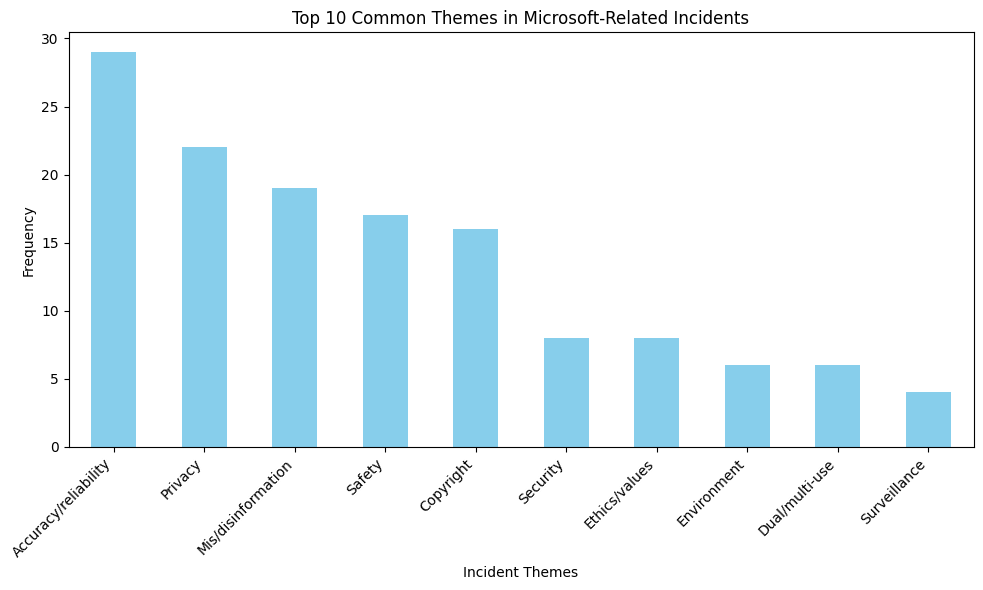

In [69]:
top_themes = theme_counts.head(10)
plt.figure(figsize=(10, 6))
top_themes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Common Themes in Microsoft-Related Incidents")
plt.xlabel("Incident Themes")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart shows the most frequent issues in incidents involving Microsoft AI systems, with Accuracy/Reliability, Privacy, and Mis/Disinformation being the most prevalent. This highlights the need for careful monitoring and enhancement of these aspects when deploying Microsoft tools.

# Visualize external harms experienced by stakeholders

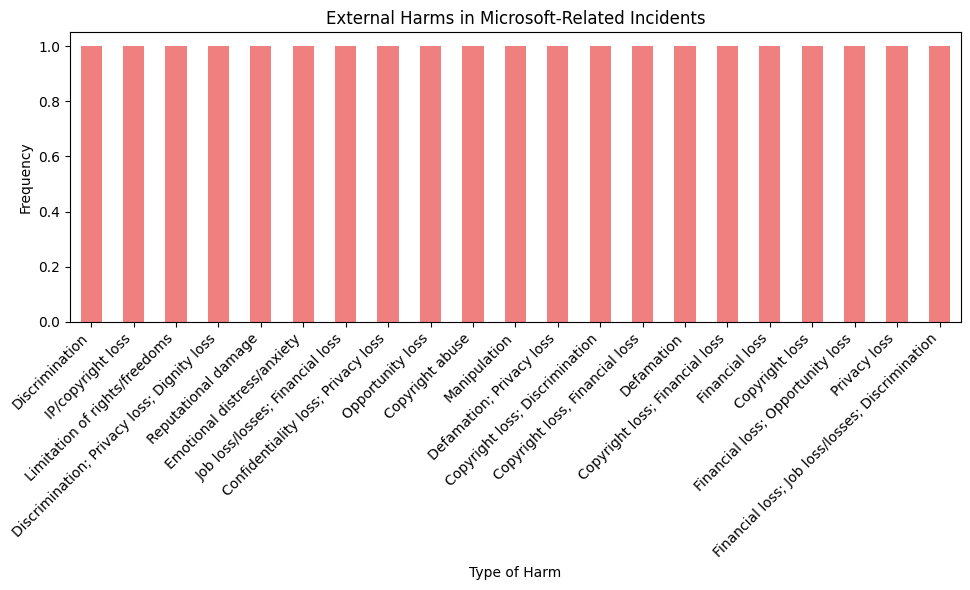

In [70]:
external_harms_counts = pd.Series(external_harms).value_counts()
plt.figure(figsize=(10, 6))
external_harms_counts.plot(kind='bar', color='lightcoral')
plt.title("External Harms in Microsoft-Related Incidents")
plt.xlabel("Type of Harm")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This visualization displays the types of external harms that stakeholders, particularly end-users, experience. Privacy loss, defamation, and discrimination are notable harms, underscoring the ethical considerations that must be addressed.

# Visualize internal harms experienced by organizations deploying Microsoft AI systems

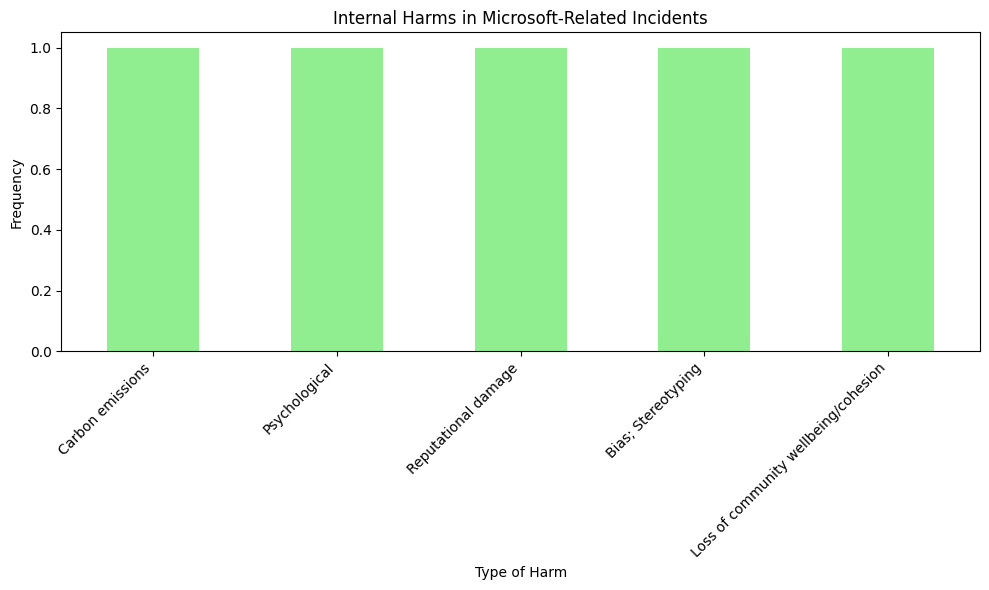

In [71]:
internal_harms_counts = pd.Series(internal_harms).value_counts()
plt.figure(figsize=(10, 6))
internal_harms_counts.plot(kind='bar', color='lightgreen')
plt.title("Internal Harms in Microsoft-Related Incidents")
plt.xlabel("Type of Harm")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart presents the internal harms organizations face when deploying Microsoft AI technologies. Reputational damage and psychological impact are the most reported, reflecting the organizational risks of deploying AI without robust safeguards.

# Visualize the distribution of Microsoft - related incidents by year (Occured)

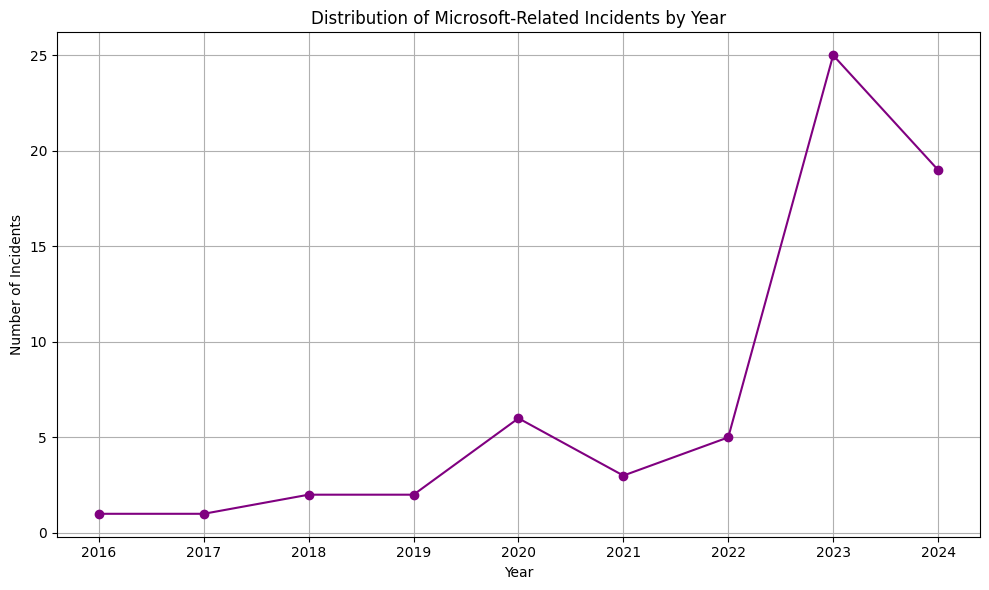

In [72]:
incident_year_counts = microsoft_incidents["Occurred"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
incident_year_counts.plot(kind='line', marker='o', color='purple')
plt.title("Distribution of Microsoft-Related Incidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart shows the trend of Microsoft-related incidents over the years. Notable increases in recent years suggest a growing number of incidents as AI adoption expands, emphasizing the importance of updated ethical frameworks and safety protocols.

# Visualise the geographic distribution of Microsoft - related incidents (Country)

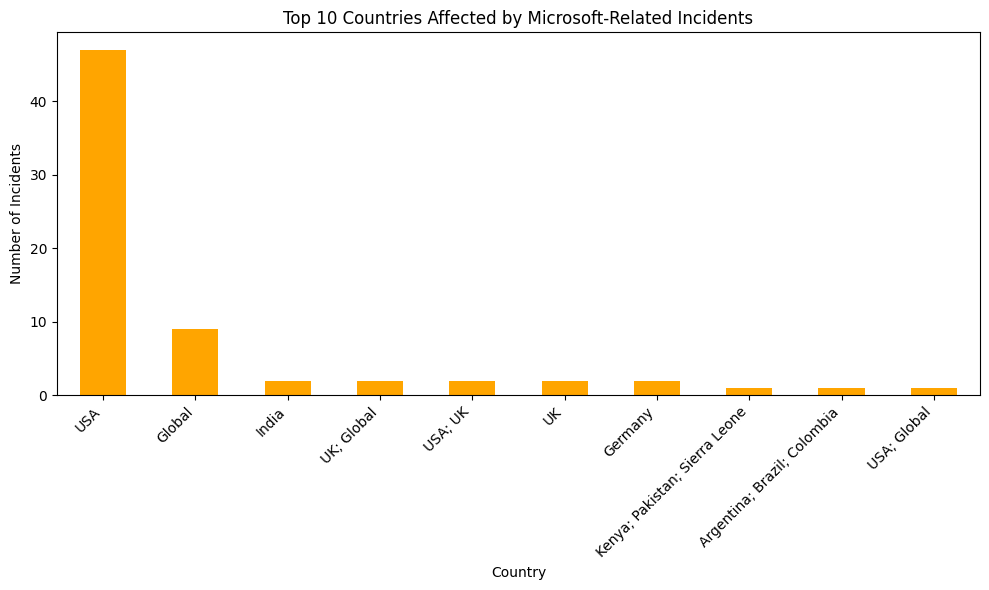

In [73]:
country_counts = microsoft_incidents["Country"].value_counts().head(10)  # Top 10 countries for clarity
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Countries Affected by Microsoft-Related Incidents")
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart illustrates the geographic distribution of incidents, with certain countries experiencing higher numbers of issues. It reflects the need for location-specific policies and guidelines tailored to regional data protection and privacy laws.

# Visualize the types of Microsoft - related incidents (Incident Type)

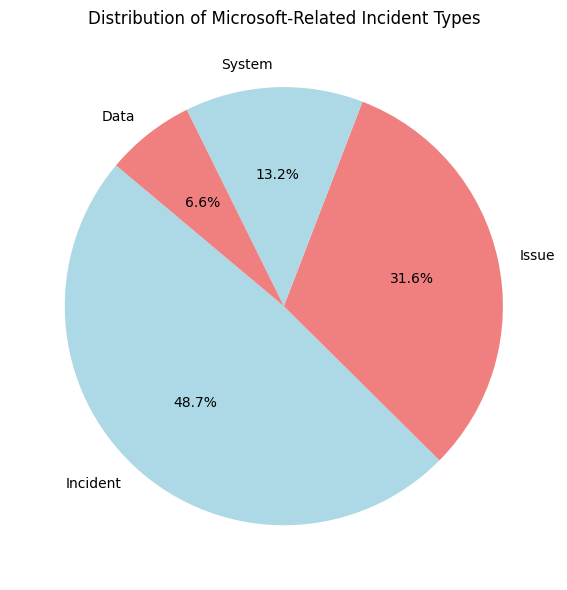

In [74]:
incident_type_counts = microsoft_incidents["Type"].value_counts()
plt.figure(figsize=(10, 6))
incident_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Microsoft-Related Incident Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

This pie chart categorizes incidents by type, showing the balance between Incidents and Issues. It provides insight into the nature of reported cases, helping stakeholders understand whether these involve persistent issues (like bias or reliability) or singular incidents (like specific security breaches).

# Heatmap of Incidents by Country and Year

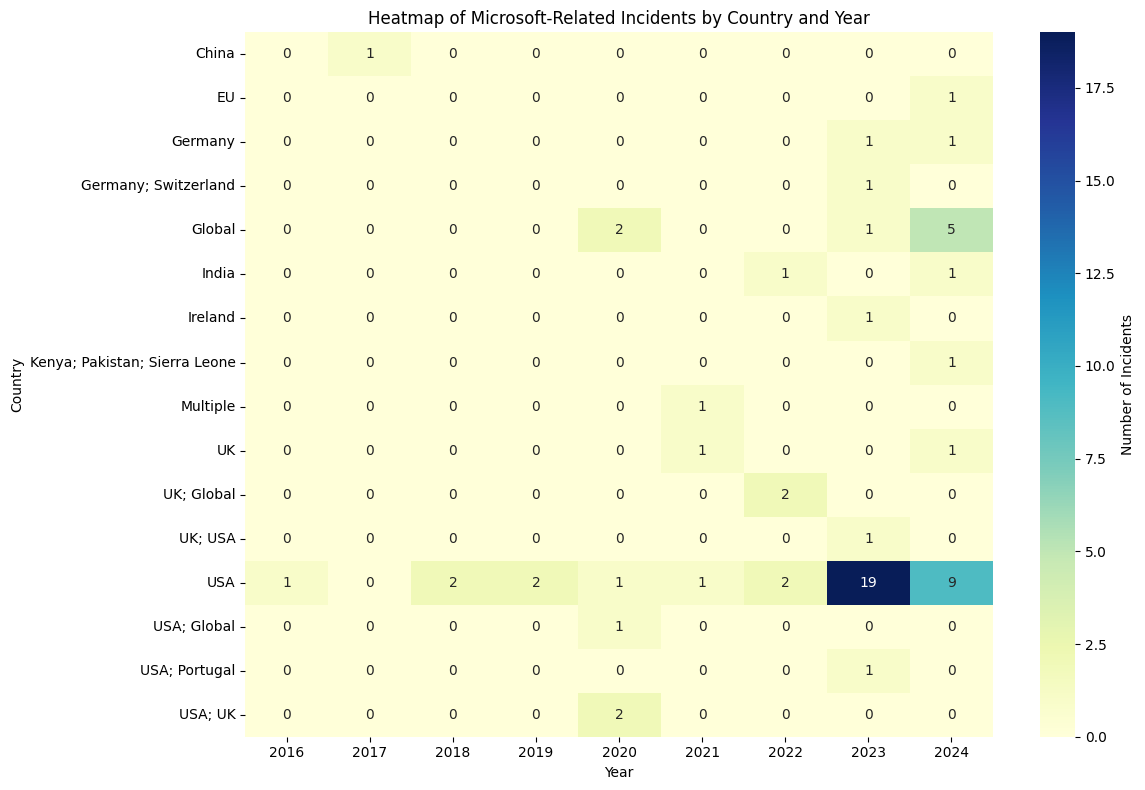

In [75]:
# Preparing data for heatmap
heatmap_data = microsoft_incidents.pivot_table(index='Country', columns='Occurred', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d', cbar_kws={'label': 'Number of Incidents'})
plt.title("Heatmap of Microsoft-Related Incidents by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



# Pair plot visualisation between Theme Frequency and External Harm Frequency in Microsoft - related incidents

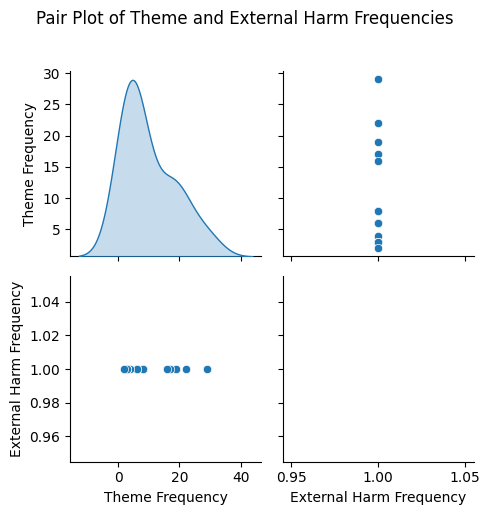

In [76]:
incident_analysis_df = pd.DataFrame({
    'Theme Frequency': top_theme_counts.values,
    'External Harm Frequency': external_harms_counts.values[:len(top_theme_counts)]
})
sns.pairplot(incident_analysis_df, diag_kind="kde")
plt.suptitle("Pair Plot of Theme and External Harm Frequencies", y=1.02)
plt.tight_layout()
plt.show()


Overall, the pair plot reveals that while there is diversity in the frequency of themes, external harms are less variable, possibly pointing to certain harms being consistently associated with various themes. This could inform further analysis on why specific harms are so common across different incident types and themes.

# Data Modeling